In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget
%matplotlib inline
import ipywidgets as widgets
import datetime
from IPython.display import display

In [2]:
dv = pd.read_csv('data visitor.txt')
dv

,Surname,id,sum in ac
0,Masnyk,12,400
1,Borovets,15,600
2,Zelenko,9,350
3,Kaparys,6,360


In [15]:
vt = pd.read_csv('види тренувань.txt')
vt

,id t,name,price for traning
0,1,віджимання,50
1,2,присідання,60
2,3,стрибки,70


In [4]:
dt1 = pd.read_csv('відомості.txt')
dt1

,Date,id,id t
0,04/11/2022,15,1
1,11/10/2022,12,3
2,10/10/2022,6,2
3,27/10/2022,9,1
4,27/11/2022,6,3


In [5]:
dt2 = pd.read_csv('відомості 2.txt')
dt2

,Date,id,id t
0,04/10/2022,15,1
1,05/10/2022,15,3
2,11/9/2022,12,3
3,11/9/2022,12,2
4,10/9/2022,6,2
5,27/9/2022,9,1
6,27/10/2022,6,3


In [6]:
dt=pd.concat([dt1, dt2])
dt

,Date,id,id t
0,04/11/2022,15,1
1,11/10/2022,12,3
2,10/10/2022,6,2
3,27/10/2022,9,1
4,27/11/2022,6,3
0,04/10/2022,15,1
1,05/10/2022,15,3
2,11/9/2022,12,3
3,11/9/2022,12,2
4,10/9/2022,6,2


# 1

In [16]:
df1=pd.merge(vt, dt)
df1=pd.merge(df1,dv)
#df1['Date']=df1['Date'].astype('datetime64')
df1['Date']=pd.to_datetime(df1.Date)
df1.sort_values('Date',inplace=True)
df1

C:\Users\user\AppData\Local\Temp\ipykernel_892\4040065948.py:4: UserWarning: Parsing '27/10/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df1['Date']=pd.to_datetime(df1.Date)
C:\Users\user\AppData\Local\Temp\ipykernel_892\4040065948.py:4: UserWarning: Parsing '27/11/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df1['Date']=pd.to_datetime(df1.Date)


,id t,name,price for traning,Date,id,Surname,sum in ac
1,1,віджимання,50,2022-04-10,15,Borovets,600
0,1,віджимання,50,2022-04-11,15,Borovets,600
2,3,стрибки,70,2022-05-10,15,Borovets,600
4,1,віджимання,50,2022-09-27,9,Zelenko,350
6,2,присідання,60,2022-10-09,6,Kaparys,360
5,2,присідання,60,2022-10-10,6,Kaparys,360
3,1,віджимання,50,2022-10-27,9,Zelenko,350
8,3,стрибки,70,2022-10-27,6,Kaparys,360
9,2,присідання,60,2022-11-09,12,Masnyk,400
11,3,стрибки,70,2022-11-09,12,Masnyk,400


In [127]:
df1['name'].value_counts()


стрибки       5
віджимання    4
присідання    3
Name: name, dtype: int64

# 2

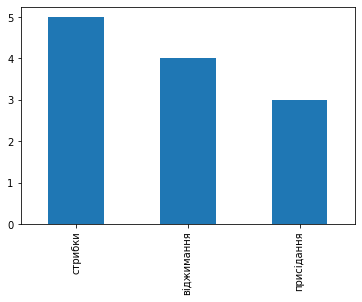

In [8]:
y=df1['name'].value_counts().plot(kind = 'bar')

# 3,4

In [43]:
def funk1(row):
   
    if row['count']>1:
        return row['price for traning']*0.6
    else: 
        return row['price for traning']
    
@widgets.interact(interval=widgets.SelectMultiple(options=df1.Date.unique()))
def f(interval):
    dffilter=df1['Date'].isin(interval)
    df2=df1[dffilter]
    
    df2['count']=df2.groupby(['Date','id'])["id t"].transform(len)
    df2['price for traning']=df2.apply(funk1,axis=1)
  
    #print(df2)
    #print(df4)
    df3=df2.groupby('id').sum().reset_index()[['id','price for traning']]
    
    df3=df3.merge(dv, on='id')
    
    df3['Remainder']=df3['sum in ac']-df3['price for traning']
    
    print(df3)
    y=df3.plot.bar(x="Surname",y="price for traning")
    plt.show()
    return 

### Через Ctrl + ЛКМ вобираємо дати які цікавлять

interactive(children=(SelectMultiple(description='interval', options=(numpy.datetime64('2022-04-10T00:00:00.00…

# 5,6

In [40]:
#6
@widgets.interact(user=widgets.Dropdown(options=dv.Surname.unique()))
def g(user):
    dfilter=df1[df1['Surname']== user]
    print(dfilter)
    df=dfilter.groupby('name').sum().reset_index()[['name','price for traning']]
    print(df)
    text= f"\nДіаграма для {user}"
    print(text)
    y=df.plot.bar(x="name",y="price for traning")
    plt.show()


interactive(children=(Dropdown(description='user', options=('Masnyk', 'Borovets', 'Zelenko', 'Kaparys'), value…